## PROBLEM STATEMENT:
#### Task 1:-Preparing a complete data analysis report on the given data.

#### Task 2:-Creating a predictive model  using machine learning techniques to predict the various classes of skin disease.

#### Task3:-Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.


# AIM:
 The aim of using a machine learning model for skin disorder disease is to enhance diagnostic accuracy and streamline treatment recommendations, ultimately improving patient outcomes and reducing healthcare costs.

# 1. Import Library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("dataset_35_dermatology (1).csv")
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


# Dataset Information:
**This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.**

- The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences.

- The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.

- Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. (Histopathology:The study of diseased cells and tissues using a microscope.)

- Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages.Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.

- The values of the histopathological features are determined by an analysis of the samples under a microscope.

- In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise.

- The age feature simply represents the age of the patient.

- Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

- The names and id numbers of the patients were recently removed from the database .

-  In age column "?" is there in 8 rows which we can replace with suitable value.

- Our target variable is CLASS and its a classification task.


# 2. Basic Checks

In [5]:
pd.set_option('display.max_columns',None)
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [6]:
data.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35,1


In [7]:
data.shape

(366, 35)

In [8]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [9]:
data.dtypes

erythema                                     int64
scaling                                      int64
definite_borders                             int64
itching                                      int64
koebner_phenomenon                           int64
polygonal_papules                            int64
follicular_papules                           int64
oral_mucosal_involvement                     int64
knee_and_elbow_involvement                   int64
scalp_involvement                            int64
family_history                               int64
melanin_incontinence                         int64
eosinophils_in_the_infiltrate                int64
PNL_infiltrate                               int64
fibrosis_of_the_papillary_dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing_of_the_rete_ridges    

In [10]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [11]:
pd.set_option('display.max_columns',None)
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [12]:
data.describe(include="O")

,Age
count,366
unique,61
top,40
freq,17


In [13]:
for i in data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print("*********************************")

erythema [2 3 1 0]
2    215
3     90
1     57
0      4
Name: erythema, dtype: int64
*********************************
scaling [2 3 1 0]
2    195
1    111
3     52
0      8
Name: scaling, dtype: int64
*********************************
definite_borders [0 3 2 1]
2    168
1     93
0     59
3     46
Name: definite_borders, dtype: int64
*********************************
itching [3 2 0 1]
0    118
2    100
3     76
1     72
Name: itching, dtype: int64
*********************************
koebner_phenomenon [0 1 2 3]
0    224
1     70
2     54
3     18
Name: koebner_phenomenon, dtype: int64
*********************************
polygonal_papules [0 3 2 1]
0    297
2     41
3     27
1      1
Name: polygonal_papules, dtype: int64
*********************************
follicular_papules [0 3 1 2]
0    333
2     16
1     11
3      6
Name: follicular_papules, dtype: int64
*********************************
oral_mucosal_involvement [0 3 2 1]
0    299
2     45
3     13
1      9
Name: oral_mucosal_involvement, d

# Domain Analysis
## ● Domain :- Healthcare
#### Brief Introduction about Skin Disorders

- Erythemato-squamous skin disorders are a group of dermatological conditions characterized by the presence of redness (erythema) and scaly or flaky skin (squamous). These conditions often share common features, such as inflammation and scaling of the skin, but they can vary in their underlying causes, clinical presentation, and severity. The diseases in this group include:

1. **Psoriasis**: Psoriasis is a chronic autoimmune condition that leads to the rapid growth of skin cells, resulting in thick, scaly, and often silvery plaques on the skin. It can affect various parts of the body and may cause itching and discomfort.

2. **Seborrheic Dermatitis**: This condition is characterized by red, itchy, and scaly patches on the scalp, face, and other oily areas of the skin. It is often associated with overactive sebaceous (oil) glands.

3. **Lichen Planus**: Lichen planus is an inflammatory skin condition that results in flat-topped, itchy, and purplish lesions on the skin or mucous membranes. It can affect various parts of the body.

4. **Pityriasis Rosea**: Pityriasis rosea is a self-limiting skin disorder that typically starts with a single, larger red or pink patch followed by the appearance of smaller, scaly lesions in a pattern resembling a "Christmas tree." It often resolves on its own.

5. **Chronic Dermatitis**: Chronic dermatitis refers to persistent inflammation of the skin, often due to various causes, such as allergies, irritants, or underlying medical conditions. It can lead to redness, itching, and skin thickening.

6. **Pityriasis Rubra Pilaris**: Pityriasis rubra pilaris is a rare, chronic skin disorder characterized by reddish-orange scaly patches on the skin, often with prominent areas of skin thickening. It typically affects the palms and soles as well.

- These erythemato-squamous skin disorders are diagnosed by dermatologists based on clinical examination, medical history, and sometimes skin biopsies. Treatment options vary depending on the specific condition and its severity and may include topical creams, oral medications, phototherapy, and lifestyle modifications. It's important for individuals with these conditions to seek professional medical advice for proper diagnosis and management.

### Introduction about each Attributes
#### Clinical Attributes:
- These clinical attributes are important for dermatologists to assess and diagnose various skin conditions accurately. They are used in clinical examinations and research to characterize the presentation and progression of dermatological diseases. Researchers and healthcare providers can analyze these attributes to understand patterns and correlations in different skin conditions and to develop treatment plans tailored to individual patients.

1. **Erythema**: Erythema refers to redness of the skin due to increased blood flow, often seen in various skin conditions.Here, 0 indicates that the Erythema was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.


2. **Scaling**: Scaling is the shedding of the outer layer of skin, resulting in the formation of flakes or scales on the skin's surface.Here,0 indicates that the Scaling was not present, 3 indicates the largest amount of Scaling is possible, and 1, 2 indicate the relative intermediate Scaling.

3. **Definite Borders**: This term indicates that a skin lesion or rash has well-defined and clear boundaries.Here,0 indicates that the rashes are not present, 3 indicates the largest amount of rashes are possible, and 1, 2 indicate the relative intermediate rashes.

4. **Itching**: Itching, or pruritus, is a sensation that prompts the desire to scratch the skin and is a common symptom in many skin disorders.Here,0 indicates that the itching was not present, 3 indicates the largest amount itching, and 1, 2 indicate the relative intermediate itching.

5. **Koebner Phenomenon**: This phenomenon refers to the development of skin lesions in areas of skin trauma or injury.Here,0 indicates that there is no injury, 3 indicates the largest amount of injury, and 1, 2 indicates the intermediate injury.

6. **Polygonal Papules**: Polygonal papules are raised, flat-topped skin lesions with multiple straight sides, often seen in some skin conditions.Here,0 indicates that the  was not present Polygonal papules, 3 indicates the largest amount of papules possible, and 1, 2 indicate the relative intermediate values.

7. **Follicular Papules**: These are small, raised bumps that originate from hair follicles and can be associated with various skin conditions.Here, 0 indicates that the Follicular Papules was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

8. **Oral Mucosal Involvement**: It indicates the presence of symptoms or lesions in the mucous membranes of the mouth.Here, 0 indicates that the oral mucosal was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

9. **Knee and Elbow Involvement**: Some skin disorders may specifically affect the skin over the knees and elbows, leading to characteristic changes.Here, 0 indicates that knee involvement was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

10. **Scalp Involvement**: This term signifies that a skin condition affects the scalp, leading to symptoms or skin changes in that area.Here, 0 indicates that scalp involvement was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

11. **Family History**: Family history refers to a person's genetic predisposition to a particular condition due to its occurrence in their family members.Here, family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise.

12. **Age**: Age refers to the chronological age of an individual and can be an important factor in understanding the onset and progression of skin disorders.The age feature simply represents the age of the patient.

#### Histopathological Attributes:
- These histopathological attributes provide crucial information for dermatopathologists and researchers to diagnose and classify various skin disorders accurately. They aid in understanding the underlying histological changes associated with different dermatological conditions.

13. **Eosinophils in the Infiltrate**: Eosinophils are a type of white blood cell that can be found in the inflammatory infiltrate or accumulation of cells in skin tissues.Here, 0 indicates that Eosinophils was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

14. **PNL Infiltrate**: PNL infiltrate may refer to the presence of polymorphonuclear leukocytes (a type of white blood cell) in the skin infiltrate, indicating inflammation.Here, 0 indicates that polymorphonuclear leukocytes was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

15. **Fibrosis of the Papillary Dermis**: This term suggests the thickening and scarring of the papillary dermis, which is the upper layer of the skin's dermis.Here, 0 indicates that thickening and scarring of the papillary dermis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

16. **Exocytosis**: Exocytosis is the process of cells releasing substances, such as immune cells moving from blood vessels into the skin.0 indicates that Exocytosis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

17. **Acanthosis**: Acanthosis is the thickening of the epidermis, the outermost layer of the skin.Here, 0 indicates that Acanthosis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.


18. **Hyperkeratosis**: Hyperkeratosis is the abnormal thickening of the outer layer of the skin, the stratum corneum.Here, 0 indicates that Hyperkeratosis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.


19. **Parakeratosis**: Parakeratosis is a condition in which skin cells retain their nuclei in the outermost layer, which is normally devoid of nuclei.Here, 0 indicates that Parakeratosis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.


20. **Clubbing of the Rete Ridges**: This refers to the enlargement and rounding of the ridges between skin layers, which can be seen in certain skin conditions.Here, 0 indicates that ridges between skin layers was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.


21. **Elongation of the Rete Ridges**: Elongation indicates that the ridges between skin layers are stretched or extended, which is observed in some skin disorders.Here, 0 indicates that skin layers are stretched or extended was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

22. **Thinning of the Suprapapillary Epidermis**: This term describes a reduction in the thickness of the epidermis above the papillary dermis.Here, 0 indicates that the  reduction in the thickness of the epidermis above the papillary dermis not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.


23. **Spongiform Pustule**: A spongiform pustule is a type of skin blister or pustule with a spongy appearance, often seen in certain skin conditions.here,0 indicates that Spongiform Pustule was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

24. **Munro Microabscess**: Munro microabscesses are small collections of white blood cells in the epidermis, typically observed in psoriasis.here,0 indicates that  Munro microabscesses was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

25. **Focal Hypergranulosis**: This is the localized thickening of the granular layer of the epidermis in the skin.here,0 indicates that Focal Hypergranulosis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

26. **Disappearance of the Granular Layer**: It signifies the loss or reduction of the granular layer in the epidermis.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

27. **Vacuolization and Damage of Basal Layer**: This term indicates the formation of vacuoles or small cavities and damage to the basal layer of the epidermis.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

28. **Spongiosis**: Spongiosis is the presence of fluid-filled spaces between skin cells, often seen in some skin conditions.. Here, 0 indicates that the spongiosis was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

29. **Saw-Tooth Appearance of Rete Ridges**: A saw-tooth appearance refers to the jagged or irregular pattern of ridges between skin layers, often seen in certain skin disorders.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

30. **Follicular Horn Plug**: This term describes the formation of plugs in hair follicles that can be associated with various skin conditions.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

31. **Perifollicular Parakeratosis**: It indicates the presence of parakeratosis around hair follicles in the skin.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

32. **Inflammatory Mononuclear Infiltrate**: This refers to the accumulation of white blood cells, specifically mononuclear cells, in inflamed skin tissue.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

33. **Band-Like Infiltrate**: A band-like infiltrate is a broad, horizontal accumulation of inflammatory cells in the skin.. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

34. **Melanin Incontinence**: Melanin incontinence is the leakage of pigment (melanin) from damaged or inflamed skin cells.Here, 0 indicates that Melanin Incontinence was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative.

35. **Class**: Class may refer to the classification or categorization of a skin disorder or a specific group of patients based on certain characteristics or criteria.the different classes are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.  

# 3. Exploratory Data Analysis

- As per the information provided, Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.

- **Clinical Features:** Erythema, Scaling, Definite_borders, Itching, Koebner_phenomenon, Polygonal_papules, Follicular_papules, Oral_mucosal_involvement, Knee_and_elbow_involvement, Scalp_involvement, Family_history, and Age.

- **Histopathological features:** Melanin_incontinence, Eosinophils_in_the_infiltrate, PNL_infiltrate, Fibrosis_of_the_papillary_dermis, Exocytosis, Acanthosis, Hyperkeratosis, Parakeratosis, Clubbing_of_the_rete_ridges, Elongation_of_the_rete_ridges, Thinning_of_the_suprapapillary_epidermis, Spongiform_pustule, Munro_microabcess, Focal_hypergranulosis, Disappearance_of_the_granular_layer, Vacuolisation_and_damage_of_basal_layer, Spongiosis, Saw-tooth_appearance_of_retes, Follicular_horn_plug, Perifollicular_parakeratosis, Inflammatory_monoluclear_inflitrate, Band-like_infiltrate.

## ● Univariate Analysis

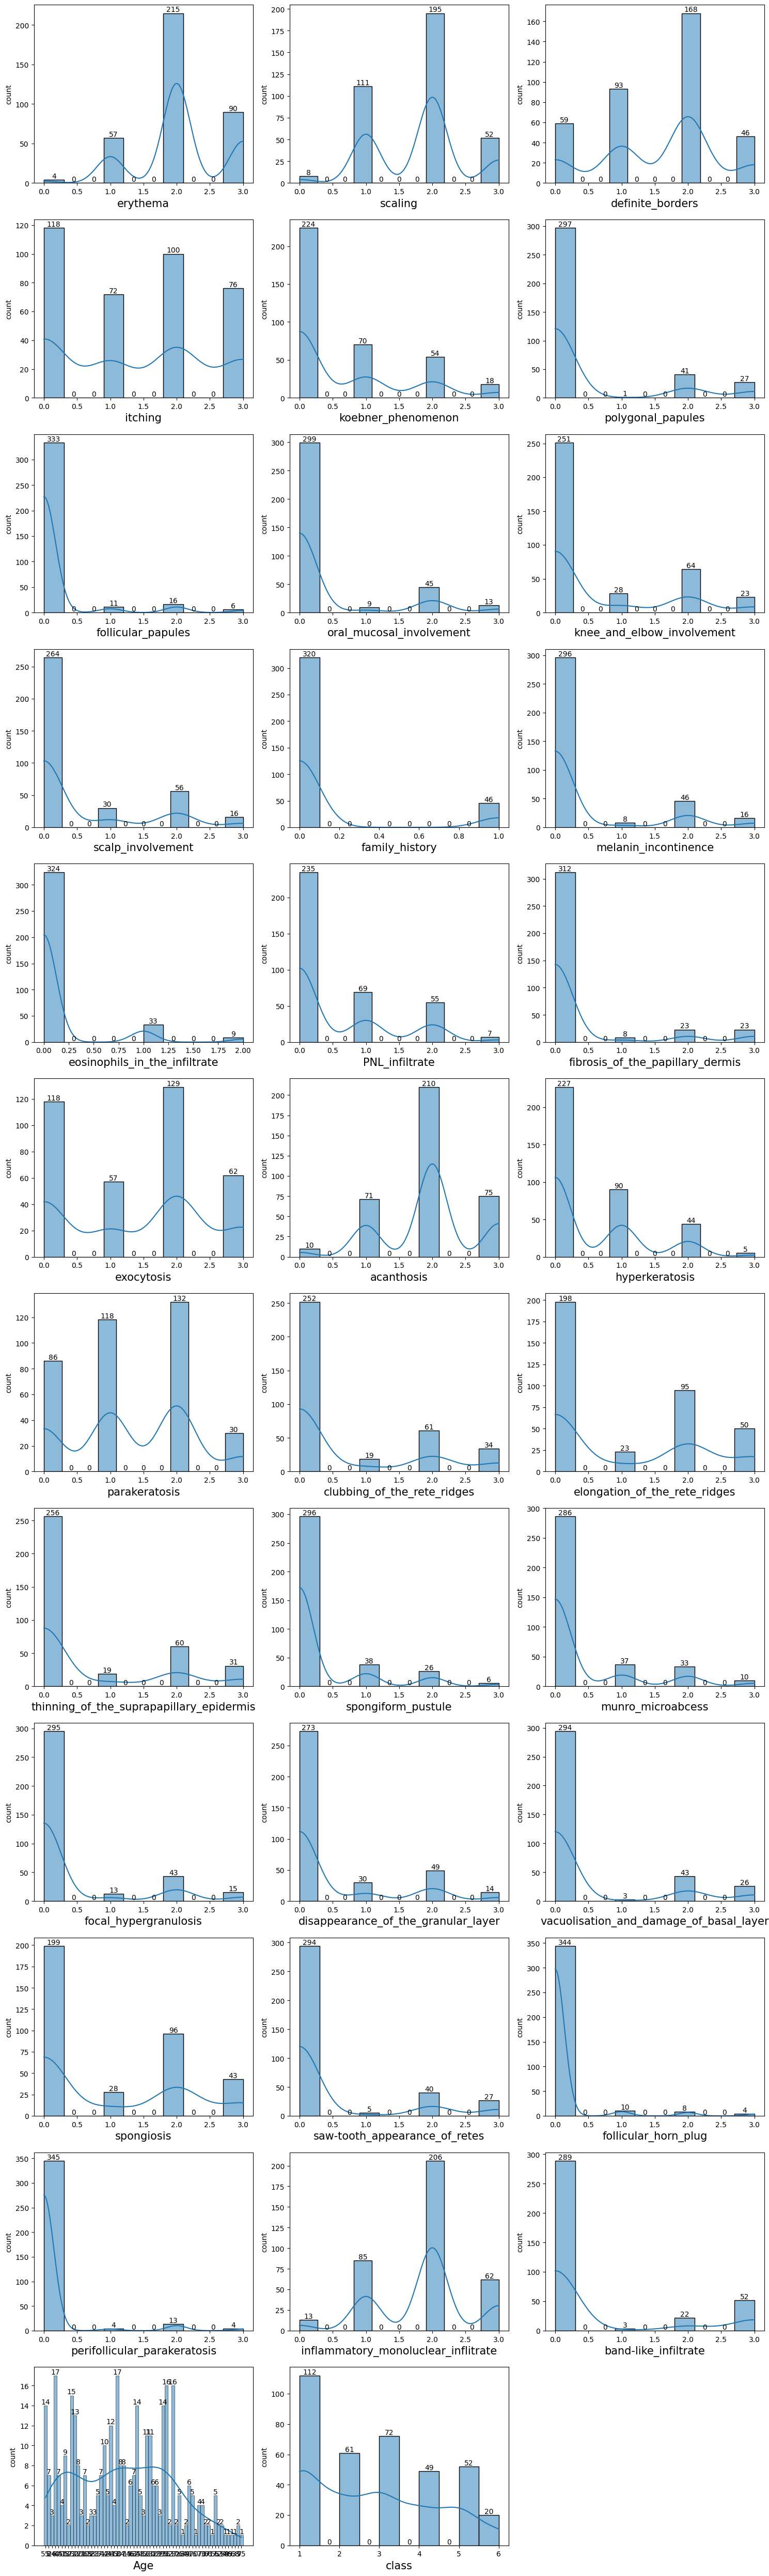

In [15]:
plt.figure(figsize=(15,50))
plotnumber=1

for column in data:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        count=sns.histplot(x=data[column],kde=True)
        for bars in count.containers:
            count.bar_label(bars)
        plt.xlabel(column,fontsize=15)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

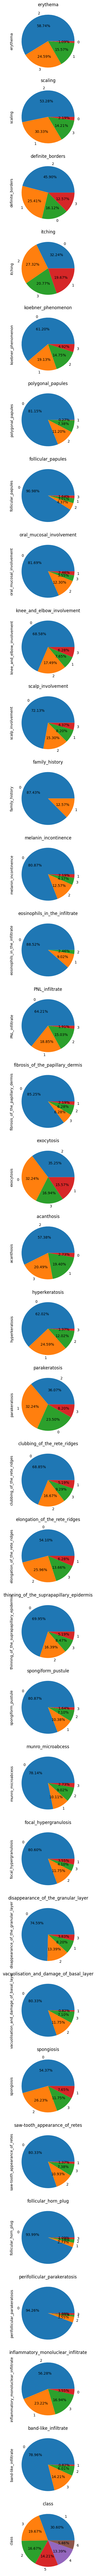

In [16]:
pie_data = data[['erythema', 'scaling', 'definite_borders', 'itching',
              'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
              'oral_mucosal_involvement', 'knee_and_elbow_involvement',
              'scalp_involvement', 'family_history', 'melanin_incontinence',
              'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
              'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
              'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
              'elongation_of_the_rete_ridges',
              'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
              'munro_microabcess', 'focal_hypergranulosis',
              'disappearance_of_the_granular_layer',
              'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
              'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
              'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
              'band-like_infiltrate', 'class']]

plt.figure(figsize=(80, 100))
plotnumber = 1

# Iterating through the columns and create pie charts
for column in pie_data:
    if plotnumber <= 34:
        plt.subplot(34,1, plotnumber)
        pie_data[column].value_counts().plot(kind='pie', autopct='%0.02f%%')
        plt.title(column)

    plotnumber += 1



plt.tight_layout()
plt.show()


# Insights of all attributes
#### Erythema
- Based on the information presented in the pie plot for the attribute "Erythema," it is evident that a significant majority, specifically 58.74%, of the data points correspond to a value of 2. Additionally, the value of 3 accounts for 24.59%, while the value of 1 comprises 15.57% of the distribution. Notably, the lowest percentage, 1.09%, is attributed to the value 0.
- The pie plot clearly illustrates that more than 55% of the data points in the "Erythema" attribute fall within the value of 2. This suggests a substantial concentration of data around this intermediate value.

#### Scaling
- The pie plot for the "Scaling" attribute reveals that the majority of data points, specifically 53.28%, correspond to a value of 2. In addition, 30.33% of the data falls within the value of 1, while 14.21% is attributed to the value of 3. Notably, the smallest percentage, 2.19%, is assigned to the value 0.
- Conclusively, the pie plot demonstrates that more than 50% of the "Scaling" attribute is concentrated around the value 2, highlighting its prominence within the dataset.

#### definite_borders
- The "definite_borders" attribute exhibits the following distribution in the dataset: 53.28% of the data corresponds to the value 2, 30.33% is attributed to the value 1, 14.21% to the value 3, and the smallest percentage, 2.19%, is assigned to the value 0. Notably, more than 50% of the "definite_borders" attribute is concentrated around the value 2, as indicated by the pie chart.

#### itching
- The distribution of the "itching" attribute within the dataset is as follows: 32.24% of the data points have a value of 0, indicating the absence of itching. Additionally, 27.32% of the data points have a value of 2, 20.77% have a value of 3, and 19.67% have a value of 1, signifying varying degrees of itching.
- The observation that more than 30% of the "itching" attribute is associated with the value 0 suggests that itching is notably absent in this subset, as a value of 0 indicates the absence or lack of this particular feature. This information is crucial for understanding the prevalence of itching within the dataset, with a significant portion of individuals (32.24%) not experiencing this symptom.
#### koebner_phenomenon
- The distribution of the "koebner_phenomenon" attribute in the dataset is as follows: 61.20% of the data points have a value of 0, indicating the absence of the koebner phenomenon. Additionally, 19.13% of the data points have a value of 1, 14.75% have a value of 2, and 4.92% have a value of 3, representing varying degrees of the koebner phenomenon.

- The observation that more than 60% of the "koebner_phenomenon" attribute is associated with the value 0 suggests that the koebner phenomenon is notably absent in this subset, as a value of 0 indicates the absence or lack of this particular feature. This information is essential for understanding the prevalence of the koebner phenomenon within the dataset, with a significant majority (61.20%) of individuals not exhibiting this phenomenon.
#### polygonal_papules
- These sentences are describing the distribution of different values for the attribute "polygonal_papules" in a dataset or context. Here's a brief summary:

1. The attribute "polygonal_papules" has four possible values: 0, 1, 2, and 3.
2. The value 0 is the most common, occurring in 81.15% of cases, indicating that it is the dominant value for this attribute.
3. The value 2 is the second most common, appearing in 11.20% of cases.
4. The value 3 is less common, with a frequency of 7.38%.
5. The value 1 is the least common, representing only 0.27% of cases.
6. A conclusion is drawn from this distribution: Since more than 80% of instances have the value 0, it suggests that "polygonal_papules" is mostly absent or not present (as 0 usually indicates the absence of a feature).

- In summary, these sentences provide information about the prevalence of different values for the attribute "polygonal_papules," with a focus on the high occurrence of value 0, suggesting its absence in the majority of cases.


#### follicular_papules
- value of 0 in follicular_papules  has 90.98%
- value of 2 in follicular_papules  has 4.37%
- value of 1 in follicular_papules  has 3.01%
- value of 3 in follicular_papules  has 1.64%
- More than 90% of attribute follicular_papules belongs to value 0 according to Pie Plot
- It means follicular_papules is absent in 90.98% as 0 indicate feature is not present


#### oral_mucosal_involvement
- These sentences provide information about the distribution of values for the attribute "oral_mucosal_involvement" in a dataset or context:

1. The attribute "oral_mucosal_involvement" has four possible values: 0, 1, 2, and 3.
2. The most common value is 0, representing 81.69% of the cases, indicating that it is the predominant value for this attribute.
3. The value 2 is the second most common, occurring in 12.30% of cases.
4. The value 3 is less common, with a frequency of 3.55%.
5. The value 1 is the least common, found in only 2.46% of cases.
6. The analysis concludes that "oral_mucosal_involvement" is largely absent in more than 80% of cases, as indicated by the high prevalence of value 0. This suggests that the feature related to oral mucosal involvement is not present in the majority of instances.

- In summary, these sentences describe the distribution of values for the attribute "oral_mucosal_involvement" and highlight the significant absence of this feature, as more than 80% of cases are associated with the value 0, indicating the feature's nonexistence in those cases.


#### knee_and_elbow_involvement
- value of 0 in knee_and_elbow_involvement  has 68.58%
- value of 2 in knee_and_elbow_involvement  has 17.49%
- value of 1 in knee_and_elbow_involvement  has 7.65%
- value of 3 in knee_and_elbow_involvement  has 6.28%
- More than 60% of attribute knee_and_elbow_involvement belongs to value 0 according to Pie Plot
- It means knee_and_elbow_involvement is absent in 68.58% as 0 indicate feature is not present.


#### scalp_involvement
- These sentences provide information about the distribution of values for the attribute "scalp_involvement" in a dataset or context:

1. The attribute "scalp_involvement" has four possible values: 0, 1, 2, and 3.
2. The most common value is 0, which is present in 72.13% of cases, making it the predominant value for this attribute.
3. The value 2 is the second most common, appearing in 15.30% of cases.
4. The value 1 is less common, with a frequency of 8.20%.
5. The value 3 is the least common, found in only 4.37% of cases.
6. The analysis concludes that "scalp_involvement" is mostly absent in more than 70% of cases, as indicated by the high prevalence of value 0. This suggests that the feature related to scalp involvement is not present in the majority of instances, specifically, it is absent in approximately 68.58% of cases.

- In summary, these sentences describe the distribution of values for the attribute "scalp_involvement" and highlight the significant absence of this feature, as more than 70% of cases are associated with the value 0, indicating the feature's nonexistence in those cases.


#### family_history
- These sentences provide information about the distribution of values for the attribute "family_history" in a dataset or context:

1. The attribute "family_history" has two possible values: 0 and 1.
2. The most common value is 0, which is present in 87.43% of cases, making it the predominant value for this attribute.
3. The value 1 is less common, with a frequency of 12.57%.
4. The analysis concludes that more than 85% of cases fall under the value 0 for "family_history." This indicates that the majority of instances, specifically 87.43%, do not have a family history related to the attribute in question.

- In summary, these sentences describe the distribution of values for the attribute "family_history" and highlight that the majority of cases, at 87.43%, do not have a family history related to this attribute, as indicated by the high prevalence of value 0.


#### melanin_incontinence
- These sentences provide information about the distribution of values for the attribute "melanin_incontinence" in a dataset or context:

1. The attribute "melanin_incontinence" has four possible values: 0, 1, 2, and 3.
2. The most common value is 0, which is present in 80.87% of cases, making it the predominant value for this attribute.
3. The value 2 is the second most common, appearing in 12.57% of cases.
4. The value 3 is less common, with a frequency of 4.37%.
5. The value 1 is the least common, found in only 2.19% of cases.
6. The analysis concludes that "melanin_incontinence" is largely absent in more than 80% of cases, as indicated by the high prevalence of value 0. This suggests that the feature related to melanin incontinence is not present in the majority of instances.

- In summary, these sentences describe the distribution of values for the attribute "melanin_incontinence" and highlight the significant absence of this feature, as more than 80% of cases are associated with the value 0, indicating the feature's nonexistence in those cases.


#### eosinophils_in_the_infiltrate
- These sentences provide information about the distribution of values for the attribute "eosinophils_in_the_infiltrate" in a dataset or context:

1. The attribute "eosinophils_in_the_infiltrate" has three possible values: 0, 1, and 2.
2. The most common value is 0, which is present in 88.52% of cases, making it the predominant value for this attribute.
3. The value 1 is the second most common, appearing in 9.02% of cases.
4. The value 2 is less common, with a frequency of 2.46%.
5. The value 3 is not present in the dataset.
6. The analysis concludes that "eosinophils_in_the_infiltrate" is mostly absent in more than 50% of cases, as indicated by the high prevalence of value 0. This suggests that the feature related to eosinophils in the infiltrate is not present in the majority of instances, specifically, it is absent in 88.52% of cases.

- In summary, these sentences describe the distribution of values for the attribute "eosinophils_in_the_infiltrate" and highlight the significant absence of this feature, as more than 50% of cases are associated with the value 0, indicating the feature's nonexistence in those cases. Additionally, it's worth noting that value 3 is not present in the dataset.


#### PNL_infiltrate
- These sentences provide information about the distribution of values for the attribute "PNL_infiltrate" in a dataset or context:

1. The attribute "PNL_infiltrate" has four possible values: 0, 1, 2, and 3.
2. The most common value is 0, which is present in 64.21% of cases, making it the predominant value for this attribute.
3. The value 1 is the second most common, appearing in 18.85% of cases.
4. The value 2 is also fairly common, with a frequency of 15.03%.
5. The value 3 is the least common, found in only 1.91% of cases.
6. The analysis concludes that "PNL_infiltrate" is mostly absent in more than 70% of cases, as indicated by the high prevalence of value 0. This suggests that the feature related to PNL infiltrate is not present in the majority of instances, specifically, it is absent in 64.21% of cases.

- In summary, these sentences describe the distribution of values for the attribute "PNL_infiltrate" and highlight the significant absence of this feature, as more than 70% of cases are associated with the value 0, indicating the feature's nonexistence in those cases.


#### fibrosis_of_the_papillary_dermis
- These sentences provide information about the distribution of values for the attribute "fibrosis_of_the_papillary_dermis" in a dataset or context:

1. The attribute "fibrosis_of_the_papillary_dermis" has four possible values: 0, 1, 2, and 3.
2. The most common value is 0, which is present in 85.25% of cases, making it the predominant value for this attribute.
3. Both values 2 and 3 are equally the second most common, each appearing in 6.28% of cases.
4. The value 1 is the least common, found in only 2.19% of cases.
5. The analysis concludes that "fibrosis_of_the_papillary_dermis" is mostly absent in more than 85% of cases, as indicated by the high prevalence of value 0. This suggests that the feature related to fibrosis in the papillary dermis is not present in the majority of instances, specifically, it is absent in 85.25% of cases.

- In summary, these sentences describe the distribution of values for the attribute "fibrosis_of_the_papillary_dermis" and highlight the significant absence of this feature, as more than 85% of cases are associated with the value 0, indicating the feature's nonexistence in those cases.


#### exocytosis
- These sentences provide information about the distribution of values for the attribute "exocytosis" in a dataset or context:

1. The attribute "exocytosis" has four possible values: 0, 1, 2, and 3.
2. The most common value is 2, which is present in 35.25% of cases, making it the predominant value for this attribute.
3. The value 0 is the second most common, appearing in 32.24% of cases.
4. The value 3 is also fairly common, with a frequency of 16.94%.
5. The value 1 is the least common, found in 15.57% of cases.
6. The analysis notes that more than 35% of cases belong to value 2 for "exocytosis," indicating that it is the dominant value in the distribution.

- In summary, these sentences describe the distribution of values for the attribute "exocytosis" and highlight that the most prevalent value is 2, which is present in more than 35% of cases. This information provides insights into the prevalence of different levels of exocytosis in the dataset or context.


#### acanthosis

- These sentences provide information about the distribution of values for the attribute "acanthosis" in a dataset or context:

1. The attribute "acanthosis" has four possible values: 0, 1, 2, and 3.
2. The most common value is 2, which is present in 57.38% of cases, making it the predominant value for this attribute.
3. The value 3 is the second most common, appearing in 20.49% of cases.
4. The value 1 is also fairly common, with a frequency of 19.40%.
5. The value 0 is the least common, found in only 2.73% of cases.
6. The analysis notes that more than 2% of cases belong to value 2 for "acanthosis," indicating that it is the dominant value in the distribution.

- In summary, these sentences describe the distribution of values for the attribute "acanthosis" and highlight that the most prevalent value is 2, which is present in more than 57% of cases. Additionally, it's noted that a very small percentage (2.73%) belongs to value 0, suggesting that "acanthosis" is mostly absent in this dataset, as indicated by the low prevalence of value 0. This information provides insights into the prevalence of different levels of acanthosis in the dataset or context.



#### hyperkeratosis
1. "Hyperkeratosis" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "hyperkeratosis" is 0, which is present in 62.02% of the cases, making it the predominant value.
3. Value 1 is the second most common, found in 24.59% of cases.
4. Value 2 is also relatively common, with a frequency of 12.02%.
5. Value 3 is the least common, appearing in only 1.37% of cases.
6. The statement, "More than 62% of attribute hyperkeratosis belongs to value 0 according to the Pie Plot," emphasizes that the majority of instances in the dataset have value 0 for hyperkeratosis.

- The concluding statement, "It means hyperkeratosis is absent in 62.02% as 0 indicates the feature is not present," explains that in approximately 62.02% of the cases, hyperkeratosis is absent. In other words, the feature related to hyperkeratosis is not present or not significant in these cases. The high prevalence of value 0 suggests a lack of hyperkeratosis in the majority of instances, making it a notable observation in the dataset.


#### parakeratosis


1. "Parakeratosis" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "parakeratosis" is 2, which is present in 36.07% of the cases, making it the predominant value.
3. Value 1 is the second most common, found in 32.24% of cases.
4. Value 0 is also fairly common, with a frequency of 23.50%.
5. Value 3 is the least common, appearing in only 8.20% of cases.
6. The statement, "More than 36% of attribute parakeratosis belongs to value 0 according to the Pie Plot," emphasizes that a significant proportion of instances in the dataset have value 0 for parakeratosis.

- The concluding statement, "It means parakeratosis is absent in 23.50% as 0 indicates the feature is not present," explains that in approximately 23.50% of the cases, parakeratosis is absent. In other words, the feature related to parakeratosis is not present or not significant in these cases. This information is important for understanding the prevalence of different levels of parakeratosis in the dataset..


#### clubbing_of_the_rete_ridges
- it's provides the information about the distribution of values for the attribute "clubbing_of_the_rete_ridges" and explain the implications of this distribution:

1. "Clubbing_of_the_rete_ridges" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "clubbing_of_the_rete_ridges" is 0, which is present in 68.85% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 16.67% of cases.
4. Value 3 is also relatively common, with a frequency of 9.29%.
5. Value 1 is the least common, appearing in only 5.19% of cases.
6. The statement, "More than 68% of attribute clubbing_of_the_rete_ridges belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for clubbing_of the rete ridges.

- The concluding statement, "It means clubbing_of_the_rete_ridges is absent in 68.85% as 0 indicates the feature is not present," explains that in approximately 68.85% of the cases, clubbing of the rete ridges is absent. In other words, the feature related to clubbing of the rete ridges is not present or not significant in these cases. This information is essential for understanding the prevalence of different levels of clubbing of the rete ridges in the dataset.


#### elongation_of_the_rete_ridges


1. "Elongation_of_the_rete_ridges" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "elongation_of_the_rete_ridges" is 0, which is present in 54.10% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 25.96% of cases.
4. Value 3 is also relatively common, with a frequency of 13.66%.
5. Value 1 is the least common, appearing in only 6.28% of cases.
6. The statement, "More than 54% of attribute elongation_of_the_rete_ridges belongs to value 0 according to the Pie Plot," emphasizes that a significant proportion of instances in the dataset have value 0 for elongation of the rete ridges.

- The concluding statement, "It means elongation_of_the_rete_ridges is absent in 54.10% as 0 indicates the feature is not present," explains that in approximately 54.10% of the cases, elongation of the rete ridges is absent. In other words, the feature related to elongation of the rete ridges is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of elongation of the rete ridges in the dataset.


#### thinning_of_the_suprapapillary_epidermis


1. "Thinning_of_the_suprapapillary_epidermis" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "thinning_of_the_suprapapillary_epidermis" is 0, which is present in 69.95% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 16.39% of cases.
4. Value 3 is also relatively common, with a frequency of 8.47%.
5. Value 1 is the least common, appearing in only 5.19% of cases.
6. The statement, "More than 69% of attribute thinning_of_the_suprapapillary_epidermis belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for thinning of the suprapapillary epidermis.

- The concluding statement, "It means thinning_of_the_suprapapillary_epidermis is absent in 69.95% as 0 indicates the feature is not present," explains that in approximately 69.95% of the cases, thinning of the suprapapillary epidermis is absent. In other words, the feature related to thinning of the suprapapillary epidermis is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of thinning of the suprapapillary epidermis in the dataset.

#### spongiform_pustule


1. "Spongiform_pustule" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "spongiform_pustule" is 0, which is present in 80.87% of the cases, making it the predominant value.
3. Value 1 is the second most common, found in 10.38% of cases.
4. Value 2 is also relatively common, with a frequency of 7.10%.
5. Value 3 is the least common, appearing in only 1.64% of cases.
6. The statement, "More than 80% of attribute spongiform_pustule belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for spongiform pustules.

- The concluding statement, "It means spongiform_pustule is absent in 80.87% as 0 indicates the feature is not present," explains that in approximately 80.87% of the cases, spongiform pustules are absent. In other words, the feature related to spongiform pustules is not present or not significant in these cases. This information is essential for understanding the prevalence of different levels of spongiform pustules in the dataset.

#### munro_microabcess


1. "Munro_microabcess" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "munro_microabcess" is 0, which is present in 78.14% of the cases, making it the predominant value.
3. Value 1 is the second most common, found in 10.11% of cases.
4. Value 2 is also relatively common, with a frequency of 9.02%.
5. Value 3 is the least common, appearing in only 2.73% of cases.
6. The statement, "More than 78% of attribute munro_microabcess belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for munro microabscess.

- The concluding statement, "It means munro_microabcess is absent in 78.14% as 0 indicates the feature is not present," explains that in approximately 78.14% of the cases, munro microabscess is absent. In other words, the feature related to munro microabscess is not present or not significant in these cases. This information is essential for understanding the prevalence of different levels of munro microabscess in the dataset.

#### focal_hypergranulosis


1. "Focal_hypergranulosis" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "focal_hypergranulosis" is 0, which is present in 80.60% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 11.75% of cases.
4. Value 3 is also relatively common, with a frequency of 4.10%.
5. Value 1 is the least common, appearing in only 3.55% of cases.
6. The statement, "More than 80% of attribute focal_hypergranulosis belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for focal hypergranulosis.

- The concluding statement, "It means focal_hypergranulosis is absent in 80.60% as 0 indicates the feature is not present," explains that in approximately 80.60% of the cases, focal hypergranulosis is absent. In other words, the feature related to focal hypergranulosis is not present or not significant in these cases. This information is essential for understanding the prevalence of different levels of focal hypergranulosis in the dataset.
#### disappearance_of_the_granular_layer


1. "Disappearance_of_the_granular_layer" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "disappearance_of_the_granular_layer" is 0, which is present in 74.59% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 13.39% of cases.
4. Value 3 is also relatively common, with a frequency of 3.83%.
5. Value 1 is the least common, appearing in only 8.20% of cases.
6. The statement, "More than 74% of attribute disappearance_of_the_granular_layer belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for the disappearance of the granular layer.

- The concluding statement, "It means disappearance_of_the_granular_layer is absent in 74.59% as 0 indicates the feature is not present," explains that in approximately 74.59% of the cases, the disappearance of the granular layer is absent. In other words, the feature related to the disappearance of the granular layer is not present or not significant in these cases. This information is essential for understanding the prevalence of different levels of this feature in the dataset.


#### vacuolisation_and_damage_of_basal_layer

1. "Vacuolisation_and_damage_of_basal_layer" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "vacuolisation_and_damage_of_basal_layer" is 0, which is present in 80.33% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 11.75% of cases.
4. Value 3 is also relatively common, with a frequency of 7.10%.
5. Value 1 is the least common, appearing in only 0.82% of cases.
6. The statement, "More than 80% of attribute vacuolisation_and_damage_of_basal_layer belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for vacuolisation and damage of the basal layer.

- The concluding statement, "It means vacuolisation_and_damage_of_basal_layer is absent in 80.33% as 0 indicates the feature is not present," explains that in approximately 80.33% of the cases, vacuolisation and damage of the basal layer are absent. In other words, the feature related to vacuolisation and damage of the basal layer is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of this feature in the dataset.

#### spongiosis


1. "Spongiosis" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "spongiosis" is 0, which is present in 54.37% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 26.23% of cases.
4. Value 3 is also relatively common, with a frequency of 11.75%.
5. Value 1 is the least common, appearing in only 7.65% of cases.
6. The statement, "More than 54% of attribute spongiosis belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for spongiosis.

- The concluding statement, "It means spongiosis is absent in 54.37% as 0 indicates the feature is not present," explains that in approximately 54.37% of the cases, spongiosis is absent. In other words, the feature related to spongiosis is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of spongiosis in the dataset.


#### saw-tooth_appearance_of_retes


1. "Saw-tooth_appearance_of_retes" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "saw-tooth_appearance_of_retes" is 0, which is present in 80.33% of the cases, making it the predominant value.
3. Value 2 is the second most common, found in 10.93% of cases.
4. Value 3 is also relatively common, with a frequency of 7.38%.
5. Value 1 is the least common, appearing in only 1.37% of cases.
6. The statement, "More than 80% of attribute saw-tooth_appearance_of_retes belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for the saw-tooth appearance of retes.

- The concluding statement, "It means saw-tooth_appearance_of_retes is absent in 80.33% as 0 indicates the feature is not present," explains that in approximately 80.33% of the cases, the saw-tooth appearance of retes is absent. In other words, the feature related to the saw-tooth appearance of retes is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of this feature in the dataset.

#### follicular_horn_plug


1. "Follicular_horn_plug" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "follicular_horn_plug" is 0, which is present in a substantial majority of cases, at 93.99%.
3. Value 1 is the second most common, found in 2.73% of cases.
4. Value 2 is also present in 2.19% of cases.
5. Value 3 is the least common, appearing in only 1.09% of cases.
6. The statement, "More than 93% of attribute follicular_horn_plug belongs to value 0 according to the Pie Plot," emphasizes that an overwhelming majority of instances in the dataset have value 0 for follicular horn plugs.

- The concluding statement, "It means follicular_horn_plug is absent in 93.99% as 0 indicates the feature is not present," explains that in approximately 93.99% of the cases, follicular horn plugs are absent. In other words, the feature related to follicular horn plugs is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of this feature in the dataset.

#### perifollicular_parakeratosis


1. "Perifollicular_parakeratosis" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "perifollicular_parakeratosis" is 0, which is present in the vast majority of cases, at 94.26%.
3. Value 2 is the second most common, found in 3.54% of cases.
4. Value 3 is present in 1.91% of cases.
5. Value 1 is the least common, appearing in only 1.09% of cases.
6. The statement, "More than 94% of attribute perifollicular_parakeratosis belongs to value 0 according to the Pie Plot," emphasizes that an overwhelming majority of instances in the dataset have value 0 for perifollicular parakeratosis.

- The concluding statement, "It means perifollicular_parakeratosis is absent in 94.26% as 0 indicates the feature is not present," explains that in approximately 94.26% of the cases, perifollicular parakeratosis is absent. In other words, the feature related to perifollicular parakeratosis is not present or not significant in these cases. This information is crucial for understanding the prevalence of different levels of this feature in the dataset.

#### inflammatory_monoluclear_inflitrate


1. "Inflammatory_mononuclear_infiltrate" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "inflammatory_mononuclear_infiltrate" is 2, which is present in a significant majority of cases, at 56.28%.
3. Value 3 is the second most common, found in 16.94% of cases.
4. Value 1 is also relatively common, with a frequency of 23.22%.
5. Value 0 is the least common, appearing in only 3.55% of cases.
6. The statement, "More than 3% of attribute inflammatory_mononuclear_infiltrate belongs to value 0 according to the Pie Plot," emphasizes that a small proportion of instances in the dataset have value 0 for an inflammatory mononuclear infiltrate.

- The concluding statement, "It means inflammatory_mononuclear_infiltrate is absent in 3.55% as 0 indicates the feature is not present," explains that in approximately 3.55% of the cases, an inflammatory mononuclear infiltrate is absent. In other words, the feature related to an inflammatory mononuclear infiltrate is not present or not significant in these cases. This information is important for understanding the prevalence of different levels of this feature in the dataset.
#### band-like_infiltrate


1. "Band-like_infiltrate" is an attribute with four possible values: 0, 1, 2, and 3.
2. The most common value for "band-like_infiltrate" is 0, which is present in the majority of cases, at 78.96%.
3. Value 3 is the second most common, found in 14.21% of cases.
4. Value 1 is also relatively common, with a frequency of 8.82%.
5. Value 2 is the least common, appearing in 6.01% of cases.
6. The statement, "More than 78% of attribute band-like_infiltrate belongs to value 0 according to the Pie Plot," emphasizes that a significant majority of instances in the dataset have value 0 for a band-like infiltrate.

- The concluding statement, "It means band-like_infiltrate is absent in 78.96% as 0 indicates the feature is not present," explains that in approximately 78.96% of the cases, a band-like infiltrate is absent. In other words, the feature related to a band-like infiltrate is not present or not significant in these cases. This information is important for understanding the prevalence of different levels of this feature in the dataset.

#### class


1. The "class" attribute represents different skin conditions or diseases.
2. The dataset contains instances classified into several categories or classes, including "Psoriasis," "Lichen_Planus," "Seborrheic_Dermatitis," "Chronic_Dermatitis," "Pityriasis_Rosea," and "Pityriasis_rubra_pilaris."
3. The percentages associated with each class represent the distribution of instances in the dataset for each skin condition or disease.
4. "Psoriasis" is the most common class, making up 30.60% of the dataset.
5. "Lichen_Planus" is the second most common, accounting for 19.67% of the cases.
6. "Seborrheic_Dermatitis" follows with 16.67%.
7. "Chronic_Dermatitis" is present in 14.21% of instances.
8. "Pityriasis_Rosea" represents 13.39% of the dataset.
9. "Pityriasis_rubra_pilaris" is the least common, found in 5.46% of cases.

- These percentages indicate the prevalence of each skin condition or disease in the dataset, which is essential for understanding the distribution and composition of the data used in the classification task.


## ● Bi-Variate Analysis

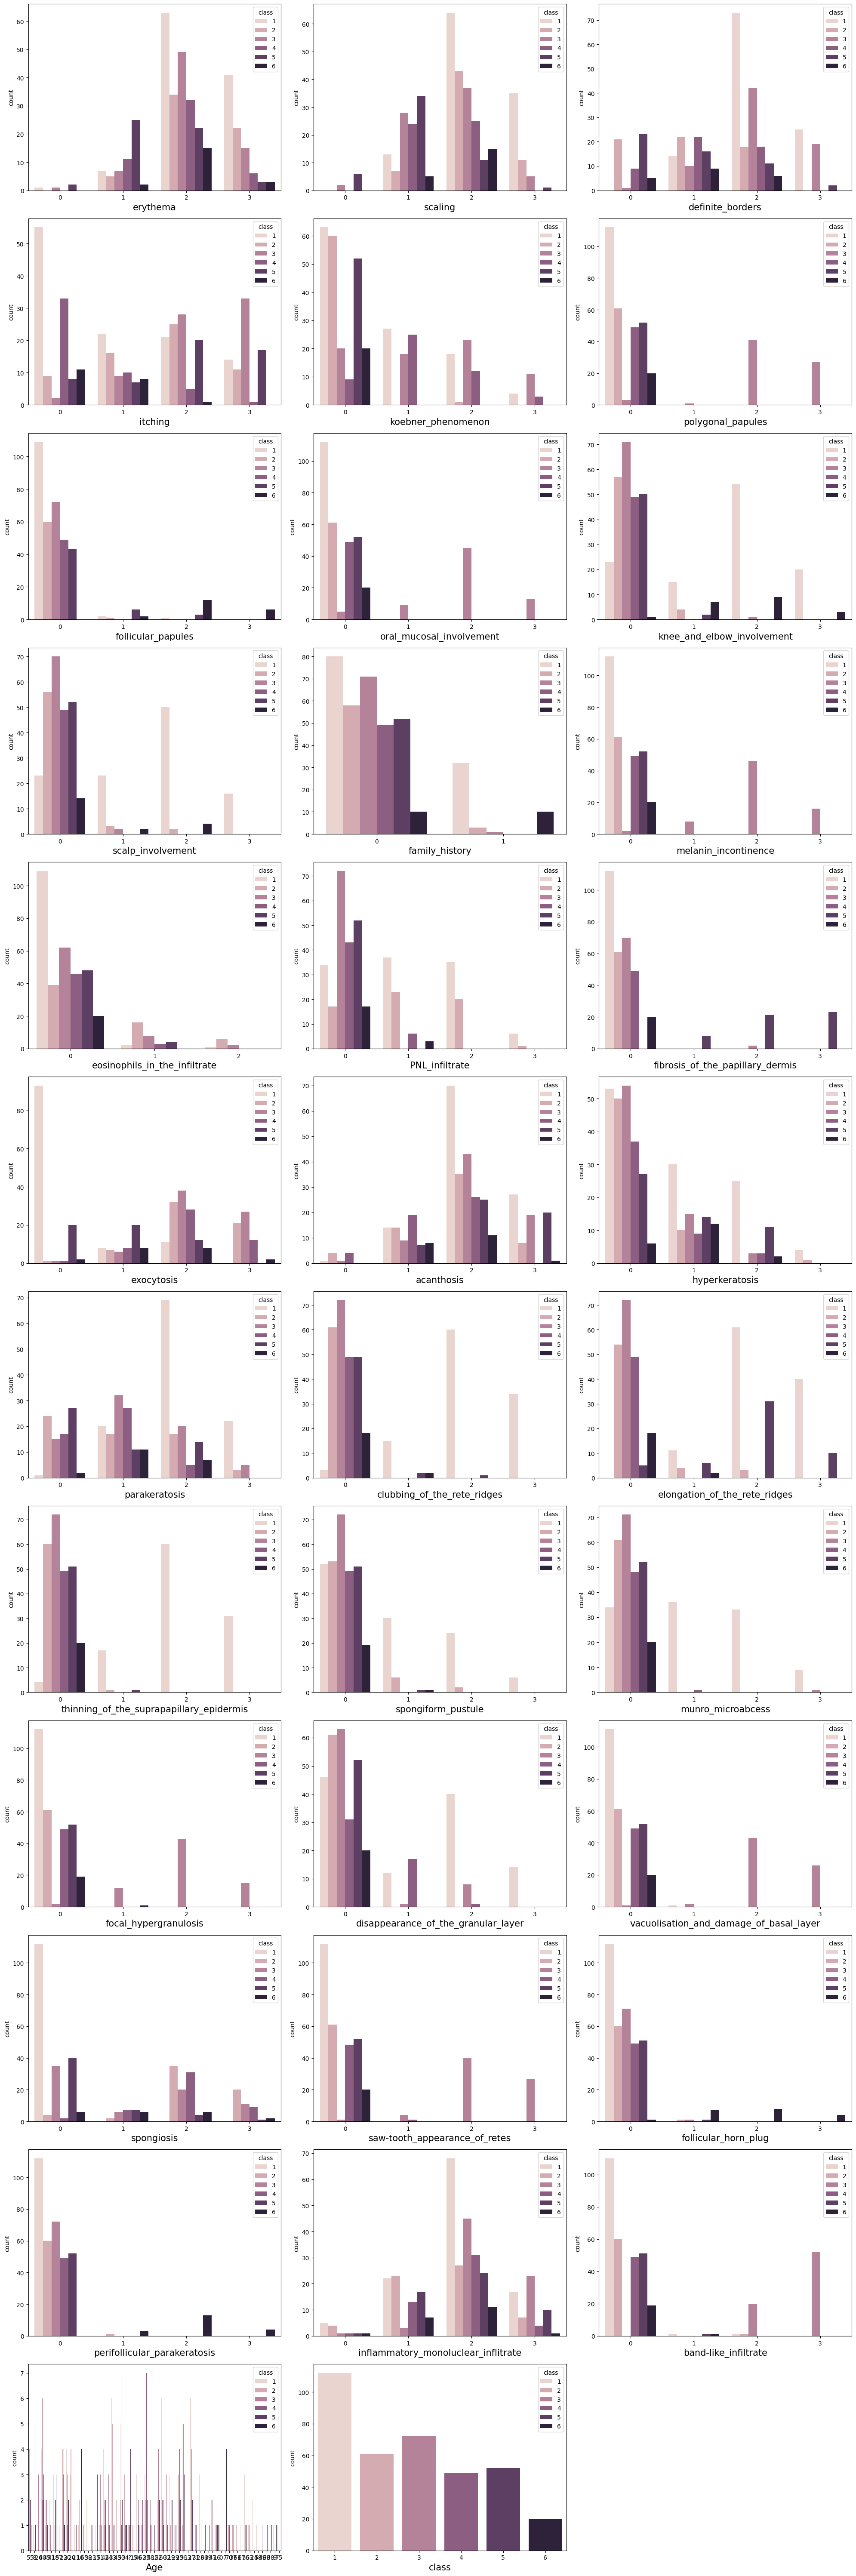

In [17]:
plt.figure(figsize=(20,60))
plotnumber=1

for column in data:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.countplot(x=data[column],hue='class',data=data)
        plt.xlabel(column,fontsize=15)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Insights
**Erythema:** Patients in which erythema level is between 0 and 1 they are mostly belongs to 5th class and patients whose class is 1 they are in second or third level of erythema.

**Scaling:**  Patients with scaling level is 0 and 1 mostly belongs to class 5, while those with a scaling level of 2 and 3 belong to class 1.

**Definite Borders:** patients whose definite border level is 0 and 1 are belongs to 2nd class and whose level is 2 and 3 are belongs to class 1.

**Itching:** Itching level is between 0 and 1 are mostly belongs to class 1 and patients with itching level 2 and 3 are mostly belongs to class 3.

**Koebner Phenomenon:** Patients with koebner phenomenon level is 0 and 1 are belongs to class 1 and the patients whose level is 2 and 3 are from third class.

**Polygonal papules:** patients with 0 level of polygonal papules are belongs to class 1 and whose level is between 1 to 3 are belongs to class 3.

**Follicular papules:** patients whose follicular paapules level is 0 and 1 are mostly belongs to class 1 and thse patients whose level is 2 and 3  are belongs to class 6.

**Oral mucosal involvement:** Patients with oral mucosal involvement level 0 are belongs class 1 and 2 and those patients whose level is between 1 to 3 are belongs to 3rd class.

**Knee and elbow invovement:** patients in which  knee and elobow involvement is not there are mostly belongs to class 3 and patients whith this type of involvement ar ebelongs to class 1 and patients who are highly affected from this involvement are belongs to class 3rd.

**Scalp invovement:** patients whose scalp involvement level is 0 are mostly belongs to 3rd clas and whose level is between 1 and 3 are belongs to 1st class.

**Family history:** most of the patients who do not heve family history are belongs to class 1 and 3 and patienst who have family history are belongs to class 6 and class 1.

**Melanin incontinence:** Patients who do not have melanin incontinence in their skin are belongs to class 1 and who have melanin incontinence are belongs to class 3.

**Eosinophils in the infiltrate:** patients who do not have eosinophils are belongs to 1 class and patinets who have eosinophils in the infiltrate in their skin are mostly belongs to class 2.

**PNL infiltrate:** patients who do not have PNL inflitrate in their skin are mostly belongs to class 3 and who have PNL infiltrate are belongs to class 1.

**Fibrosis of the papillary dermis:** Patients with fibrosis of the papillary dermis level is 0 are belongs to class 1 and those whose level is between 1 and 3 are belongs to class 5.

**Exocytosis:** Patients with exocytosis level is 0 are mostly belongs to class 1 and some of are belongs to class 5 and who are between 1 to 3 level of exocytosis ar emostly belongs to class 3.

**Acanthosis:** patients who do not have acanthosis in their skin are belongs to class 2 and 3 and patients whos acanthosis level is 2 and 3 are mostly belongs to class 1.

**Hyperkeratosis:** patients whose hypetkeratosis level is 0 are common in all classes but the patients whose level is between 1 to 3 are mostly belongs to class 1.

**Parakeratosis:** In patients if parakertosis is not present then its mostly belongs to class 5 and who are in level 1 they are belongs to class3 and who are in parakeratosis level 2 and 3 they are mostly belongs to class 1.

**Clubbing of the rete ridges:** In patients if clubbing of the rete ridges is not present then its belongs to class 3 and if level is one and three then they are mostly belongs to 1 class and if level is 2 thry belongs to class 2.

**Elongation of the rete ridges:** patients with elongation of rete ridges level is 0 mostly belongs to class 3, while those with a elongstion of the rete ridges level of 1 to 3 mostly belongs to class 1 and class 5.

**Thinning of the suprapapillary epidermis:** patients with level 0 mojorly belongs to class 3 and 2, while those with level 1 to 3 mostly belong to class 1.

**Spongiform pustule:** patients with spongiform pustule level is 0 means it no present mostly belongs to class 3, while those spongiform pustule level 1 to 3 they are belongs to class 3.

**Munro microabcess:** Patients with munro microabcess level is 0 mostly belongs to class 3, while those with level is 2 and 3 belongs to class 1.

**Focal Hypergranulosis:** patientys with focal hypergranulosis level 0 belongs to 1, while those with level 1 to 3 belongs to class 3.

**Disappearance of the granular layer:** patients with lavel 0 mostly belongs to class 2 and 3, while those with level 1 belongs to class 4 and with level 3 and 4  belongs to class 1.

**Vacuolisation and damage of basal layer:** patients with level 0 belongs to class 1 and with level 1 to 3 are belongs to third class.

**Spongiosis:** Patients with Spongiosis level is 0 mostly belongs to class 1, while those with a Spongiosis level of 2 and 3 belong to class 2 and with level 1 belongs to class 5 mostly.

**Saw tooth appearance of retes:** Patients with Saw tooth appearance of retes level  0 belongs to class 1, while those with a Saw tooth appearance of retes level of 1,2 and 3 belong to class 3.

**Follicular horn plug:** Patients in which follicular horn plug level is between 1 and 3 they are mostly belongs to 6th class and patients whose level is 0 they mostly belongs to class 1.


In [18]:
combined_counts = data.groupby(['erythema', 'class']).size()
print(combined_counts)

erythema  class
0         1         1
          3         1
          5         2
1         1         7
          2         5
          3         7
          4        11
          5        25
          6         2
2         1        63
          2        34
          3        49
          4        32
          5        22
          6        15
3         1        41
          2        22
          3        15
          4         6
          5         3
          6         3
dtype: int64


##  ● Multivariate Analysis

In [19]:
sns.pairplot(data)

# 4. Data Preprocessing

## ● Null Value

In [20]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

 **There is no null value in this dataset**

## ● Duplicates

In [21]:
data.duplicated().sum()

0

**There is no duplicate value present in dataset**

## ● Replace values

In [23]:
data.loc[data['Age']=='?']

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
33,2,2,1,0,0,0,0,0,1,0,1,0,0,2,0,0,2,1,2,2,1,2,0,1,0,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,1,1,0,0,0,2,1,1,2,0,0,0,0,0,1,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,3,2,2,1,3,0,0,0,0,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,0,0,0,0,3,2,3,1,2,2,2,0,0,0,0,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,0,0,0,0,3,2,3,2,1,1,3,0,0,0,0,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,0,0,0,0,2,1,3,1,1,0,2,0,1,0,0,0,0,2,0,0,0,3,0,?,5


#  As there is a string character in the age column i.e "?", so we first need to replace that with NaN value and then we'll replace that with mean or median. we also need to change the datatype of the age column from object to int or float to find its mean or median

In [24]:
data['Age'].dtype

dtype('O')

In [25]:
# replace ?with nan
data['Age'] = data['Age'].replace('?', np.nan)

In [26]:
#Convert the column to a numeric type (if it's not already) so that you can calculate the median:
data['Age'] = pd.to_numeric(data['Age'])

In [27]:
median = data.Age.median()
median

35.0

In [28]:
data['Age'] = data['Age'].fillna(median)

In [29]:
data['Age'].dtype

dtype('float64')

In [30]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.267760,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.156875,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


**We replace the "?" values with median of Age**

## ● Outlier

<Axes: xlabel='Age'>

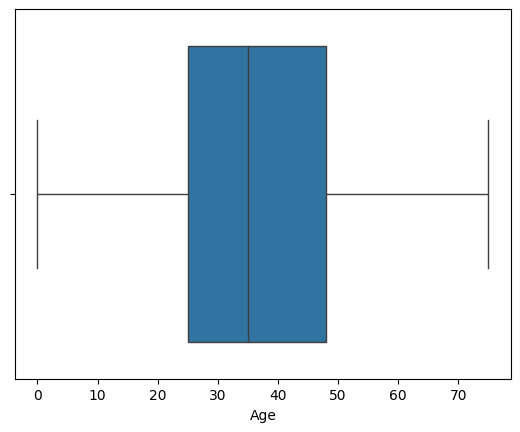

In [31]:
sns.boxplot(x=data.Age)

**There is no outlier in age column**

## ● Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
data[['Age']]=scaling.fit_transform(data[['Age']])

In [33]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,0.483570,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,0.202092,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.333333,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.466667,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.640000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,6.000000


# 5. Model Creation

In [34]:
x=data.drop('class',axis=1)
y=data[['class']]

In [35]:
x

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0.733333
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,0.106667
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,0.346667
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,0.533333
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0.333333
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0.480000
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,0.373333
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,0.666667


In [36]:
y

,class
0,2
1,1
2,3
3,1
4,3
...,...
361,4
362,4
363,3
364,3


### ● Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(0.20),random_state=2)

In [38]:
print('x_train:-',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train:- (292, 34)
x_test: (74, 34)
y_train: (292, 1)
y_test: (74, 1)


## 1. Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred=model1.predict(x_test)
y_pred

array([4, 2, 6, 1, 2, 5, 3, 5, 5, 2, 3, 4, 3, 3, 4, 3, 5, 1, 6, 3, 1, 1,
       1, 3, 2, 6, 3, 1, 1, 3, 4, 2, 4, 1, 1, 4, 1, 4, 1, 1, 2, 6, 3, 1,
       1, 5, 1, 2, 2, 5, 3, 5, 5, 1, 1, 1, 2, 3, 1, 5, 6, 4, 5, 1, 5, 3,
       2, 1, 2, 1, 4, 1, 1, 3])

In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score

In [42]:
# Testing Accuracy
LR=accuracy_score(y_test,y_pred)
LR

1.0

In [43]:
# Traning Accuracy
y_train_pred1=model1.predict(x_train)

In [44]:
accuracy_score(y_train,y_train_pred1)

0.9965753424657534

In [45]:
confusion_matrix(y_test,y_pred)

array([[24,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  5]])

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         5

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



## 2. Support Vector Machine

In [47]:
from sklearn.svm import SVC
model2=SVC()
model2.fit(x_train,y_train)

SVC()

In [48]:
y_pred2=model2.predict(x_test)

In [49]:
SVM=accuracy_score(y_test,y_pred2)
SVM

0.9864864864864865

In [50]:
confusion_matrix(y_test,y_pred2)

array([[24,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  1,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  5]])

In [51]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      0.91      0.95        11
           3       1.00      1.00      1.00        14
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         5

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [52]:
y_train_pred=model2.predict(x_train)

In [53]:
accuracy_score(y_train,y_train_pred)

0.9828767123287672

## 3. Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred3=model3.predict(x_test)

In [56]:
# Test Accuracy
DT=accuracy_score(y_test,y_pred3)
DT

0.9594594594594594

In [57]:
# Train Accuracy
y_train_pred3=model3.predict(x_train)

In [58]:
accuracy_score(y_train,y_train_pred3)

1.0

In [59]:
confusion_matrix(y_test,y_pred3)

array([[23,  0,  0,  1,  0,  0],
       [ 0,  9,  0,  1,  0,  1],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  5]])

In [60]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        24
           2       1.00      0.82      0.90        11
           3       1.00      1.00      1.00        14
           4       0.82      1.00      0.90         9
           5       1.00      1.00      1.00        11
           6       0.83      1.00      0.91         5

    accuracy                           0.96        74
   macro avg       0.94      0.96      0.95        74
weighted avg       0.97      0.96      0.96        74



**Hyperparameter**

In [61]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini","entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1,20))),
    "min_samples_split":[2,3,4],
    "min_samples_leaf":list(range(1, 20)),
}

In [62]:
hp_model= DecisionTreeClassifier()
hp_model=GridSearchCV(hp_model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
hp_model.fit(x_train,y_train)
best_params = hp_model.best_params_
print(f"Best Parameters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [63]:
model_hp=DecisionTreeClassifier(criterion= 'gini', max_depth= 15, min_samples_leaf= 2, min_samples_split= 3, splitter= 'random')

In [64]:
model_hp.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=3,
                       splitter='random')

In [65]:
y_predhp=model_hp.predict(x_test)

In [66]:
DT2=accuracy_score(y_test,y_predhp)
DT2

0.9594594594594594

In [67]:
confusion_matrix(y_test,y_predhp)

array([[24,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  2,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  1,  0,  8,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  5]])

## 4. Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier(n_estimators=50)
model4.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [69]:
y_pred4=model4.predict(x_test)

In [70]:
# Test Accuracy
RF=accuracy_score(y_test,y_pred4)
RF

0.9864864864864865

In [71]:
# Training Accuracy
y_train_pred=model4.predict(x_train)

In [72]:
accuracy_score(y_train,y_train_pred)

1.0

In [73]:
confusion_matrix(y_test,y_pred4)

array([[24,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  1,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  5]])

In [74]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      0.91      0.95        11
           3       1.00      1.00      1.00        14
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         5

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



**Hyperparameter**

In [75]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]

In [76]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1', param_distributions=random_grid, n_iter=100, cv=3,
                          verbose=2, random_state=42, n_jobs=-1)


In [77]:
rf_cv.fit(x_train,y_train)
rf_best_params = rf_cv.best_params_
print(f"best parameters:{rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
best parameters:{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80})


In [78]:
rf_model4 = RandomForestClassifier(n_estimators = 1800, min_samples_split = 5, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 80)
rf_model4.fit(x_train,y_train)
y_pred_4hp=rf_model4.predict(x_test)

In [79]:
RF1=accuracy_score(y_test,y_pred_4hp)
RF1

1.0

In [80]:
confusion_matrix(y_test,y_pred_4hp)

array([[24,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  5]])

In [81]:
print(classification_report(y_test,y_pred_4hp))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         5

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



## 5. Gradient Boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
model5=GradientBoostingClassifier()
model5.fit(x_train,y_train)

GradientBoostingClassifier()

In [83]:
y_pred5=model5.predict(x_test)

In [84]:
# Testing Accuracy
GB=accuracy_score(y_test,y_pred5)
GB

0.9594594594594594

In [85]:
# Training Accuracy
y_train_pred5=model5.predict(x_train)

In [86]:
accuracy_score(y_train,y_train_pred5)

1.0

In [87]:
confusion_matrix(y_test,y_pred5)

array([[24,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  2,  0,  1],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  5]])

In [88]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      0.73      0.84        11
           3       1.00      1.00      1.00        14
           4       0.82      1.00      0.90         9
           5       1.00      1.00      1.00        11
           6       0.83      1.00      0.91         5

    accuracy                           0.96        74
   macro avg       0.94      0.95      0.94        74
weighted avg       0.97      0.96      0.96        74



## Scores

In [91]:
scores=[LR,RF1,SVM,DT2,GB]
algorithms=['Logistic Regression','Random Forest','SVM','Decision Tree','Gradient Boosting' ]
for i in range(len(algorithms)):
    print(algorithms[i] +" = " +str(scores[i]))

Logistic Regression = 1.0
Random Forest = 1.0
SVM = 0.9864864864864865
Decision Tree = 0.9594594594594594
Gradient Boosting = 0.9594594594594594


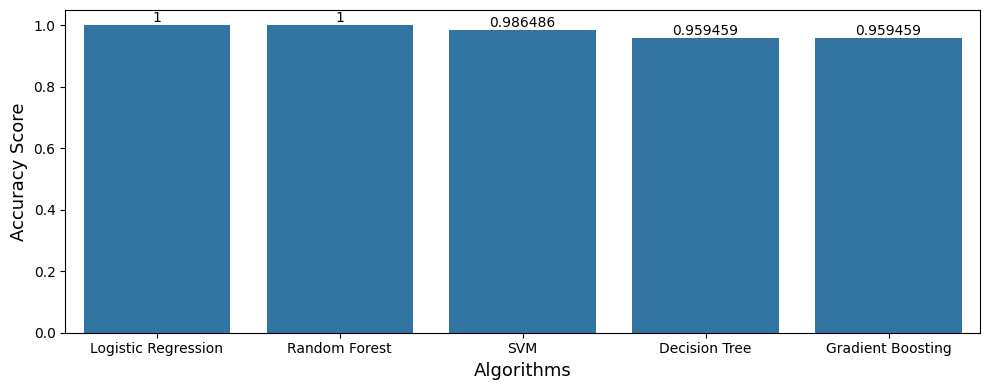

In [92]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x=algorithms,y=scores)
plt.xlabel("Algorithms",fontsize=(13))
plt.ylabel("Accuracy Score",fontsize=(13))
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()

### CONCLUSION:
**We try with multiple machine learning model to predict classes of skin disorder. among them the logistic regression and Random forest works well and delivering an exceptional accuracy score of 100% .our model is performing well across all classes with high accuracy.**

**we made 5  machine learning models which have been studied and tuned and evaluated for acheiving better performance of the model using various metrices and accuracy scores.**

**The Logistic regression and Random foresr classifier Model has given a better accuracy Score and F1 Score compared to other classifier models and hence recommend to use logistic or Random forest classifier Model in order for the doctors to identify the skin diseases of the patient at the earliest.**

**Implementing a Randomm forest or Logistic regressor for skin disease identification, it'll be a  useful tool to aid doctors in the early detection and diagnosis of skin conditions.**

### CHALLENGES FACED:
**The age feature had NAN and zero values which were replaced using the median of the age feature.**

**Various classifier models were studied and evaluated using accuracy score, classification report and confusion matrix.**

**The model with highest accuracy score and F1 Score was obtained in Logistic regressor and Random Forest classifier and hence will be the deciding factor.**